# "# Twitter Data Sentiment Analysis\n",

 1) Twitter Data:- First step is to configure twitter API and gather twitter data
 
 2) Clean the data
 
 3) Sentiment:- To find out sentiments
 
 4) Analysis:- To do analysis
 
 5)plotting and Visualizing the counts

# installation of Libraries and Packages

In [1]:
pip install tweepy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install wordcloud

In [3]:
!pip install pandas 

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Code begins

In [12]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


# Twitter Api Credentials
APIkey= "6e9NdMl4faDsuKZnzMeeUs7Of"
APISecreatKey= "SeJqKOeSp4tCZGYWqFhPxdlCoV5z3hWp5rGblwEsV5LdlGemxO"
accessToken= "1434032678970429441-XiwwPoHT4Gj6yZEn2hAJOD1vnfIjEE"
accessTokenSecreat= "VKfK3kTPSvWYqsWjlmoAfCnvPd7Wi1JV5nqkj4XN6mXul"

# Create the authentication object
authenticate = tweepy.OAuthHandler(APIkey,APISecreatKey)
# Set the access token and access token secret
authenticate.set_access_token(accessToken,accessTokenSecreat)
# Creating the API object while passing in auth information
api= tweepy.API(authenticate) 


# Extract and Analyze the Data
the 10 most recent tweets on screen_name = "Rahul"

In [31]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="Rahul", count = 100,lang ="en", tweet_mode="extended")
i=1
for tweet in posts[:10]:
    print(str(i)+ ')'+ tweet.full_text +'\n')
    i=i+1

Unexpected parameter: lang


1)RT @roryreckons: People often ask me how I tell the difference between ADHD and Autism. It's hard - I know ADHD people ask this more, so he…

2)"we fixed it, now it's alphabetic and inclusive of non-binary people"

🤨 https://t.co/OlyN2Dj5C1

3)what kind of energy supermix is this, youtube https://t.co/VNqFaaHeMP

4)@bombsfall this thread in Reader mode is next level

5)https://t.co/3sQmAKyTfp

6)RT @DavidRickmann: This thread is ova rated.

7)@unknownrelic 😠

8)@imdanielholt @trulyaliem just as well, that house has no corners to sob in anyway

9)@mattfgl no but I might have to now!! this is just my average wednesday afternoon

10)is the existence of consciousness of net benefit to the universe?



In [32]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df


,Tweets
0,RT @roryreckons: People often ask me how I tel...
1,"""we fixed it, now it's alphabetic and inclusiv..."
2,"what kind of energy supermix is this, youtube ..."
3,@bombsfall this thread in Reader mode is next ...
4,https://t.co/3sQmAKyTfp
...,...
95,RT @irondavy: Submitted for your approval: my ...
96,@aboodman I remember asking chrome devrel for ...
97,RT @PennyRed: ‘Normal life will come back slow...
98,@aboodman @ErikArvidsson This is literally one...


# Create a function to clean the tweets


In [33]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,: People often ask me how I tell the differenc...
1,"""we fixed it, now it's alphabetic and inclusiv..."
2,"what kind of energy supermix is this, youtube"
3,this thread in Reader mode is next level
4,
...,...
95,: Submitted for your approval: my TOP FIFTY de...
96,I remember asking chrome devrel for the jQuer...
97,: ‘Normal life will come back slow and strange...
98,This is literally one of my interview questi...


# Sentimental Analysis
on a general statetement (test case)

In [36]:
analysis=TextBlob("Today was the wonderful  day")

analysis.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [37]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df


,Tweets,Subjectivity,Polarity
0,: People often ask me how I tell the differenc...,0.520833,0.104167
1,"""we fixed it, now it's alphabetic and inclusiv...",0.200000,0.100000
2,"what kind of energy supermix is this, youtube",0.900000,0.600000
3,this thread in Reader mode is next level,0.000000,0.000000
4,,0.000000,0.000000
...,...,...,...
95,: Submitted for your approval: my TOP FIFTY de...,0.600000,0.166667
96,I remember asking chrome devrel for the jQuer...,1.000000,-0.750000
97,: ‘Normal life will come back slow and strange...,0.365000,0.060000
98,This is literally one of my interview questi...,0.700000,0.800000


# word cloud visualization

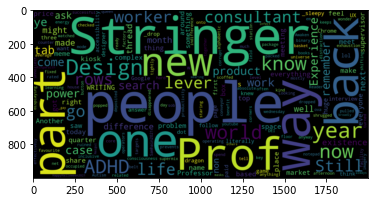

In [48]:

# word cloud visualization
allWords = ' '.join([i for i in df['Tweets']])
Cloud = WordCloud(width=2000, height=1000, random_state=33, max_font_size=333).generate(allWords)


plt.imshow(Cloud, interpolation="bilinear")
plt.show()

# Analysis of Tweets

In [39]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
   if score <0:
      return 'Negative'
   elif score == 0:
       return 'Neutral'
   else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,: People often ask me how I tell the differenc...,0.520833,0.104167,Positive
1,"""we fixed it, now it's alphabetic and inclusiv...",0.200000,0.100000,Positive
2,"what kind of energy supermix is this, youtube",0.900000,0.600000,Positive
3,this thread in Reader mode is next level,0.000000,0.000000,Neutral
4,,0.000000,0.000000,Neutral
...,...,...,...,...
95,: Submitted for your approval: my TOP FIFTY de...,0.600000,0.166667,Positive
96,I remember asking chrome devrel for the jQuer...,1.000000,-0.750000,Negative
97,: ‘Normal life will come back slow and strange...,0.365000,0.060000,Positive
98,This is literally one of my interview questi...,0.700000,0.800000,Positive


# % of +ve and -ve Tweets

In [44]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

39.0

In [45]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

14.0

# The most positive tweet is the 1 tweet.

In [40]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) : People often ask me how I tell the difference between ADHD and Autism. It's hard - I know ADHD people ask this more, so he…

2) "we fixed it, now it's alphabetic and inclusive of non-binary people"

🤨 

3) what kind of energy supermix is this, youtube 

4) The consultant got out her notepad and checked a box. This facility was operating effectively and would meet its counter-productivity targets for the quarter.

Yes, this would do. Another successful day as a DEI consultant on the books.

5) “What are they doing?”

The supervisor shrugged. “Not much. It keeps them occupied. That lever’s the key.”

“Why?”

“Between you and me… it makes ‘em feel like they're doing something,” he scoffed. “But mostly it prevents them from doing anything.”

6)  the Nazgul are doing it right because they're always wearing masks. based

7) _gay: ADHD life 

8) : More broadly, it SOUNDS sexy and ingenious to find simple solutions for complex, pressing problems. But in practice

# The most negative tweet is the #1 tweet.


In [41]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)  no but I might have to now!! this is just my average wednesday afternoon

2)   my favourite part about this was that it made me wonder what other field i could spend a month learning about only to have everything around me in the world that related to it ruined

3) She watched as one of the operators pulled back on their lever. A package popped out, dropped onto a conveyor belt, and was deposited a few rows down, where it disappeared into another worker's kiosk. She turned to the supervisor.

4) Looking out over the factory floor, the distraction, exhaustion and indifference consultant saw rows and rows of workers, packed tightly together, staring at kiosks displaying shifting imagery. Each station had a button, a lever and a basket.

5) : Awaken the unholiest queen, ready to corrupt the core of your absolute being. 💋👑🩸
Samhain2021 HappyHalloween2021 
(1/3…

6)  the concept of letting go of irrational annoyances :/

7) Stringer (shaking his head): "And if

# COUNTS OF +VE, -VE AND NEUTRAL

In [42]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     47
Positive    39
Negative    14
Name: Analysis, dtype: int64

#                     Plotting of tweets 
             according to (subjectivity and polarity)

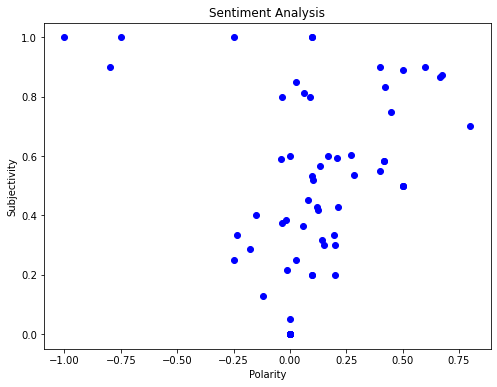

In [43]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

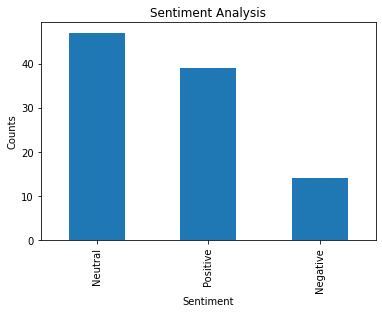

In [47]:
 #Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()